In [ ]:
#uploading kaggle.json for downloading data to colab directly from kaggle
#data set : https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"aurjay","key":"76629cfcd0859b7029cd74dcb13501a9"}'}

In [ ]:
#uploading kaggle.json for downloading data to colab directly from kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
#uploading kaggle.json for downloading data to colab directly from kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [21]:
#uploading kaggle.json for downloading data to colab directly from kaggle
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 97% 596M/612M [00:07<00:00, 17.0MB/s]
100% 612M/612M [00:07<00:00, 85.0MB/s]


In [22]:
import os 
import zipfile
#extracting downloaded dataset
local_zip = '/content/gtsrb-german-traffic-sign.zip'
zip_ref = zipfile.ZipFile(local_zip,"r")
zip_ref.extractall("/content")
zip_ref.close()

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
Epoch 1/15
981/981 [==============================] - 9s 9ms/step - loss: 3.0739 - accuracy: 0.3664 - val_loss: 0.2900 - val_accuracy: 0.9424
Epoch 2/15
981/981 [==============================] - 8s 8ms/step - loss: 0.5037 - accuracy: 0.8552 - val_loss: 0.0909 - val_accuracy: 0.9788
Epoch 3/15
981/981 [==============================] - 8s 8ms/step - loss: 0.2949 - accuracy: 0.9210 - val_loss: 0.1057 - val_accuracy: 0.9676
Epoch 4/15
981/981 [==============================] - 8s 8ms/step - loss: 0.2624 - accuracy: 0.9277 - val_loss: 0.0896 - val_accuracy: 0.9730
Epoch 5/15
981/981 [==============================] - 8s 8ms/step - loss: 0.2431 - accuracy: 0.9337 - val_loss: 0.0509 - val_accuracy: 0.9879
Epoch 6/15
981/981 [==============================] - 8s 8ms/step - loss: 0.2112 - accuracy: 0.9429 - val_loss: 0.0637 - val_accuracy: 0.9837
Epoch 7/15
981/981 [==============================] - 8s 8ms/step 

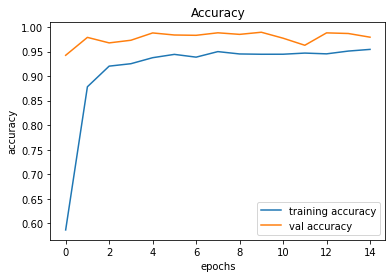

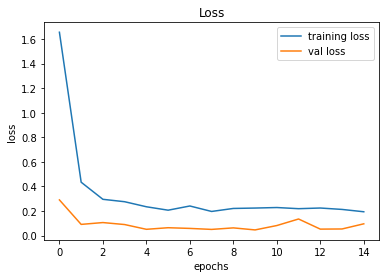

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


accuracy_score 0.9482185273159145


In [34]:
#importing the necessary packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
#initializing the empty array for appending
data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '//'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

#Building the CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print("accuracy_score",accuracy_score(labels, pred))

model.save("traffic_sign_classifier.h5")